In [6]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt

In [7]:
"""
The Argument is The correlation between variables is non-realistic
"""



np.random.seed(42)


n_rows = 1000


mean_ph = 5.8
std_dev_ph = 2
water_ph_level = np.random.normal(mean_ph, std_dev_ph, n_rows)
water_ph_level = np.clip(water_ph_level, 0, 14)


mean_temp = 25
std_dev_temp = 15
temperature = np.random.normal(mean_temp, std_dev_temp, n_rows)
temperature = np.clip(temperature, 0, 60)


mean_exp = 18
std_dev_exp = 2
daily_sun_exposure = np.random.normal(mean_exp, std_dev_exp, n_rows)
daily_sun_exposure = np.clip(daily_sun_exposure, 12, 19)


mean_nutrient = 2
std_dev_nutrient = 1.3
nutrient = np.random.normal(mean_nutrient, std_dev_nutrient, n_rows)
nutrient = np.clip(nutrient, 0, 4)


mean_humidity = 75
std_dev_humidity = 20
humidity = np.random.normal(mean_humidity, std_dev_humidity, n_rows)
humidity = np.clip(humidity, 0, 101)


mean_sun = 10609
std_dev_sun = 18
sun_exposure_intensity = np.random.normal(mean_sun, std_dev_sun, n_rows)
sun_exposure_intensity = np.clip(sun_exposure_intensity, 800, 100000) #Clear Day and Dark night


mean_wl = 655
std_dev_wl = 2
visible_light_wavelength = np.random.normal(mean_wl, std_dev_wl, n_rows)
visible_light_wavelength = np.clip(visible_light_wavelength, 380, 741)


mean_temp = 25
std_dev_temp = 15
temperature_deviation = np.random.normal(mean_temp, std_dev_temp, n_rows)
temperature_deviation = np.clip(temperature_deviation, 0, 60)

mean_h = 75
std_dev_h = 15
humidity_deviation = np.random.normal(mean_h, std_dev_h, n_rows)
humidity_deviation = np.clip(humidity_deviation, 0, 100)

# Generating synthetic values within specified value ranges
dsp = np.random.randint(0, 76, n_rows)
fan_speed = np.random.randint(0,100, n_rows)



# Base ETH (in days) for lettuce under ideal conditions: Assuming a base range of 50-70 days
base_eth = np.random.randint(45, 61, n_rows)

# Adjusting ETH based on generated parameters
# Assuming humidity and sun exposure intensity can shorten ETH by up to 10%, 
# while extreme temperatures (>30 degrees) and high wind speeds (>15 m/s) can increase ETH by up to 15%

eth_adjustments = (0.05 * humidity / 100) + \
                  (0.05 * abs((sun_exposure_intensity - 32000) / (100000 - 32000))) + \
                  (0.1 * (temperature > 30)) + \
                  (0.1 * abs((daily_sun_exposure - 18) / (18 - 12))) + \
                  (0.1 * abs((water_ph_level - 5.8) / 14)) + \
                  (0.1 * abs((nutrient - 2) / 3)) + \
                  (0.05 * abs((visible_light_wavelength - 650) / (740 - 380))) + \
                  (0.1 * abs((temperature_deviation - 25) / 60)) + \
                  (0.05 * (humidity_deviation / 100)) + \
                  (-0.01 * (fan_speed / 100))

adjusted_eth = base_eth + (base_eth * eth_adjustments)
adjusted_eth = np.clip(adjusted_eth, 45, None)
                  


adjusted_eth = base_eth + (base_eth * eth_adjustments)

# Creating a DataFrame with the fake data
fake_df = pd.DataFrame({
    'Day since planted': dsp,
    'Humidity (%)': humidity,
    'Temperature (°C)': temperature,
    'Daily Sun Exposure (hours)': daily_sun_exposure,
    'Water pH Level': water_ph_level,
    'Nutrient Level': nutrient,
    'Sun Exposure Intensity (Lux)': sun_exposure_intensity,
    'Visible Light Wavelength (nm)': visible_light_wavelength,
    'Temperature Deviation (°C)': temperature_deviation,
    'Humidity Deviation (%)': humidity_deviation,
    'Fan Speed (%)': fan_speed,
    'ETH (days)': np.round(adjusted_eth, 2)
})


# Display the first few rows of the fake dataset
fake_df.head()


,Day since planted,Humidity (%),Temperature (°C),Daily Sun Exposure (hours),Water pH Level,Nutrient Level,Sun Exposure Intensity (Lux),Visible Light Wavelength (nm),Temperature Deviation (°C),Humidity Deviation (%),Fan Speed (%),ETH (days)
0,14,57.730128,45.990332,16.649643,6.793428,0.000000,10601.372326,652.771837,36.777776,74.504621,46,75.03
1,25,74.375930,38.869505,17.710963,5.523471,0.881499,10600.838546,653.738138,0.000000,67.445246,89,69.52
2,2,75.360337,25.894456,16.415160,7.095377,1.462313,10576.678423,653.115880,35.721185,72.414376,0,52.27
3,19,84.452607,15.295948,17.384077,8.846060,4.000000,10603.058377,653.904008,21.494139,85.720976,93,61.03
4,39,47.662833,35.473350,14.212771,5.331693,2.723519,10622.190923,654.571699,35.611866,94.167850,56,59.34


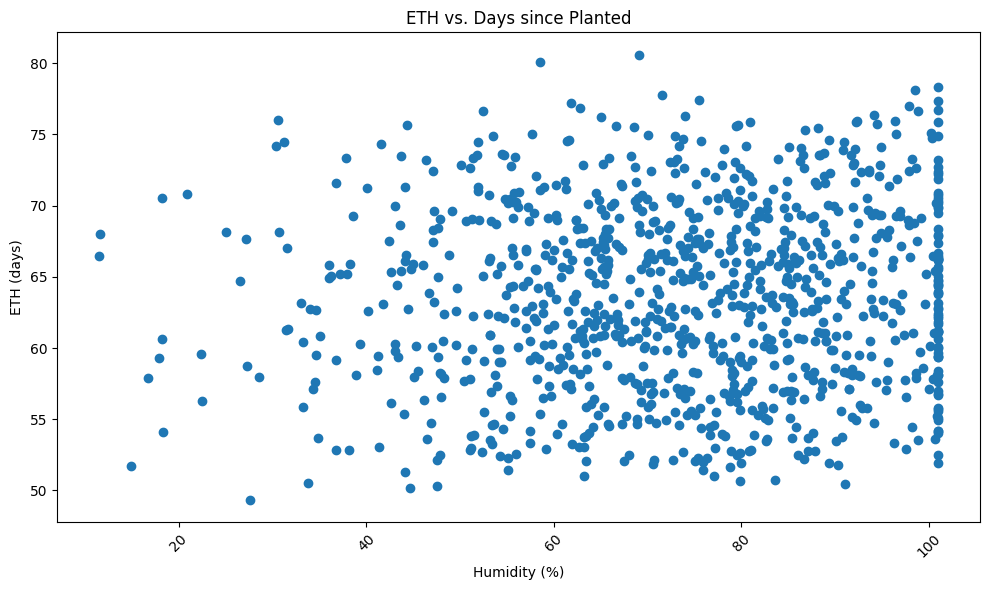

In [8]:
# Select the variables for the bar plot
x = fake_df['Humidity (%)']
y = fake_df['ETH (days)']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
ax.scatter(x, y)

# Set the plot title and labels
ax.set_title('ETH vs. Days since Planted')
ax.set_xlabel('Humidity (%)')
ax.set_ylabel('ETH (days)')

# Rotate the x-tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [3]:
# Select the variables for the bar plot
x = fake_df['Temperature (°C)']
y = fake_df['ETH (days)']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
ax.scatter(x, y)

# Set the plot title and labels
ax.set_title('Temperature (°C)')
ax.set_xlabel('Humidity (%)')
ax.set_ylabel('ETH (days)')

# Rotate the x-tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'fake_df' is not defined

In [4]:
fake_df.corr()

NameError: name 'fake_df' is not defined

In [5]:
fake_df.describe()

NameError: name 'fake_df' is not defined

In [33]:
fake_df.to_csv(os.getcwd() + '/fake_df.csv')

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [35]:
data = fake_df.copy()

In [36]:
from sklearn.model_selection import train_test_split

# Removing the unnecessary 'Unnamed: 0' column
#data_cleaned = data.drop(columns=['Unnamed: 0'])

# Splitting the data into features (X) and target (y)
X = data.drop(columns=['ETH (days)'])
y = data['ETH (days)']

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the shapes of the splits
X_train.shape, X_val.shape, X_test.shape

((700, 11), (150, 11), (150, 11))

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 2000],
    'max_depth': [None, 10, 200],
    'min_samples_split': [1, 550],
    'min_samples_leaf': [1, 550]
}

# Initializing the Grid Search with Random Forest Regressor and 5-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Scoring was negative MAE, so we negate it to get positive MAE

best_params, best_score

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 2000},
 3.7119086999999915)

In [38]:

# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=2000, random_state=42, min_samples_leaf =1 , min_samples_split = 2, n_jobs=-1)

# Training the model on the training set
rf_model.fit(X_train, y_train)

# Predicting on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Calculating evaluation metrics for the validation set
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
r2_rf = r2_score(y_val, y_val_pred_rf)

mae_rf, rmse_rf, r2_rf

(3.297021966666635, 4.696351528443953, 0.9854737185280228)

In [39]:

import joblib

# Saving the best model from grid search
model_path = os.getcwd() + 'pred.joblib'
joblib.dump(grid_search.best_estimator_, model_path)

# Load the model to confirm it works
loaded_model = joblib.load(model_path)

KeyError: 5

In [26]:
predictions

array([31.159015, 12.42871 , 20.083935, 89.507415, 98.13944 ])